In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans

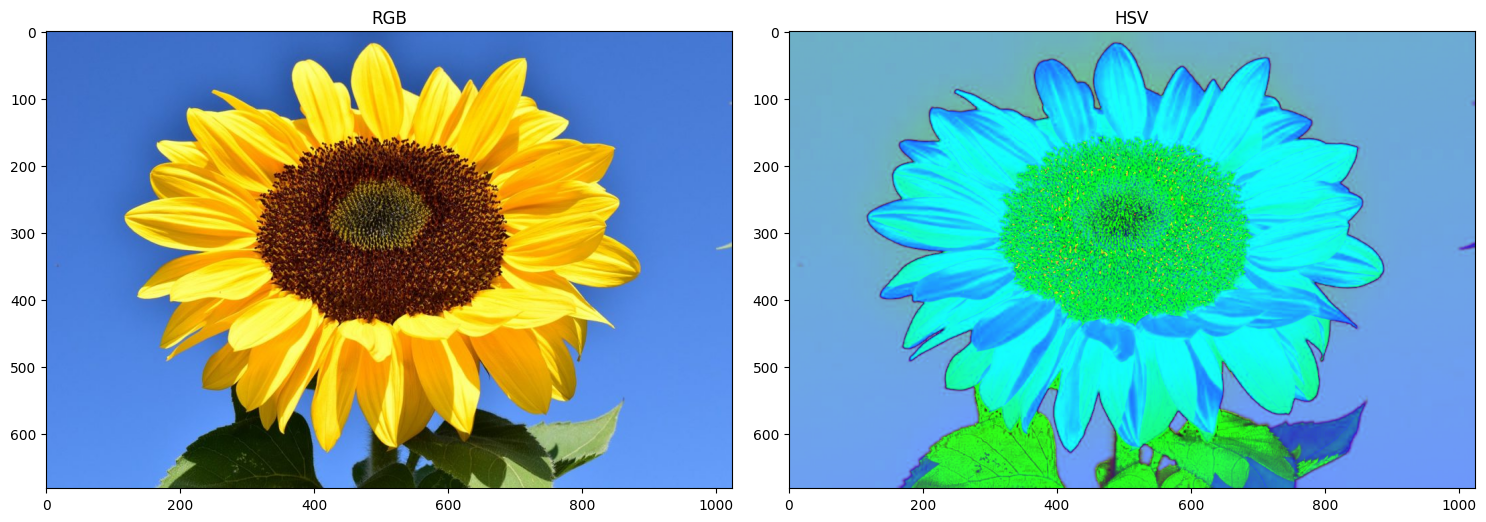

In [2]:
img = cv2.imread('data/girassol.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(1, 2, figsize=(15,20))
axes[0].imshow(rgb)
axes[0].set_title('RGB')

axes[1].imshow(hsv)
axes[1].set_title('HSV')
plt.tight_layout()
plt.show()

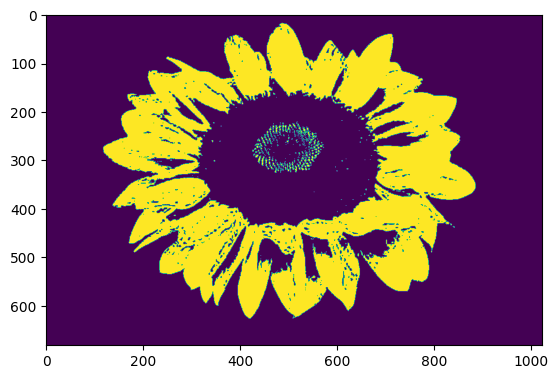

In [3]:
# Extrair os pixels amarelos
lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
upper_yellow = np.array([30, 255, 255], dtype=np.uint8)
yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

plt.imshow(yellow_mask.tolist())

In [16]:
# Aplicar o algoritmo K-means aos pixels amarelos
yellow_pixels = cv2.bitwise_and(hsv, hsv, mask=yellow_mask)
yellow_pixels = yellow_pixels.reshape(-1, 3)  # Redimensionar para uma matriz 2D

# Definir o número de clusters
k = 3

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(yellow_pixels)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Criar uma imagem em branco para visualizar os clusters
clustered_image = np.zeros_like(hsv)

# Preencher a imagem com os pixels de cada cluster
for cluster_id in range(k):
    cluster_mask = (labels == cluster_id)
    cluster_indices = np.nonzero(cluster_mask)[0]
    
    if len(cluster_indices) > 0:
        cluster_pixels = yellow_pixels[cluster_indices]
        mean_color = np.mean(cluster_pixels, axis=0).astype(np.uint8)
        clustered_image[cluster_indices] = mean_color

# Mostrar a imagem original e a imagem com os clusters
cv2.imshow('Imagem Original', hsv)
cv2.imshow('Pixels Amarelos Agrupados', clustered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

c:\Users\mathe\miniconda3\envs\savefarm\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: index 682 is out of bounds for axis 0 with size 682

In [5]:
import cv2
import numpy as np

# Lendo a imagem de entrada
imagem = cv2.imread('data/girassol.jpg')

# Definindo o tamanho do pool e o stride
pool_tamanho = (2, 2)
stride = (2, 2)

# Obtendo as dimensões da imagem
altura = imagem.shape[0]
largura = imagem.shape[1]


# Calculando as dimensões da saída
altura_saida = int((altura - pool_tamanho[0]) / stride[0]) + 1
largura_saida = int((largura - pool_tamanho[1]) / stride[1]) + 1

# Criando uma matriz vazia para armazenar a imagem de saída
imagem_pooling = np.zeros((altura_saida, largura_saida), dtype=np.uint8)

# Aplicando o max pooling
for i in range(altura_saida):
    for j in range(largura_saida):
        janela = imagem[i * stride[0]:i * stride[0] + pool_tamanho[0], j * stride[1]:j * stride[1] + pool_tamanho[1]]
        imagem_pooling[i, j] = np.amax(janela)

# Exibindo a imagem de saída
cv2.imshow('Max Pooling', imagem_pooling)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
imagem = cv2.imread('data/girassol.jpg')
imagem.shape

(682, 1024, 3)